<a href="https://colab.research.google.com/github/SrujanV010/Used-Car-Price-Predictor/blob/main/Used_Car_Price_Predictor_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing required libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Read the DataSet

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Miner Project/used_car_dataset.csv')

###Understand the DataSet

In [10]:
df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2105 non-null   object
 1   car_price_in_rupees  2105 non-null   object
 2   kms_driven           2105 non-null   object
 3   fuel_type            2105 non-null   object
 4   city                 2105 non-null   object
 5   year_of_manufacture  2105 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 98.8+ KB


In [12]:
df.describe()

,year_of_manufacture
count,2105.000000
mean,2017.022803
std,2.818066
min,2004.000000
25%,2015.000000
50%,2017.000000
75%,2019.000000
max,2022.000000


In [13]:
df.isnull().sum()

car_name               0
car_price_in_rupees    0
kms_driven             0
fuel_type              0
city                   0
year_of_manufacture    0
dtype: int64

In [14]:
df['car_price_in_rupees'].str.contains('Lakh').sum()

2098

In [15]:
df['car_price_in_rupees'].str.contains('Crore').sum()

5

In [16]:
df[~((df['car_price_in_rupees'].str.contains('Lakh')) | (df['car_price_in_rupees'].str.contains('Crore')))]

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
499,Tata Indica V2 DLE BS-III,"₹ 60,000","50,000 km",Diesel,Pallikarnai,2007
1635,Maruti Suzuki Estilo LXi,"₹ 99,991","29,012 km",Petrol,Kolkata,2008


### **Data preprocessing and cleaning**

In [17]:
import re

In [18]:
def convert_price_to_numeric(price):
    price = price.replace('₹', '').replace(',', '').strip()
    value = 0

    if 'Lakh' in price:
        value = float(re.findall(r'\d+\.\d+|\d+', price)[0]) * 100000
    elif 'Crore' in price:
        value = float(re.findall(r'\d+\.\d+|\d+', price)[0]) * 10000000
    else:
        value = float(re.findall(r'\d+\.\d+|\d+', price)[0])

    return value

In [19]:
df['Price_Numeric'] = df['car_price_in_rupees'].apply(convert_price_to_numeric)

In [20]:
df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,Price_Numeric
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016,445000.0
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019,293000.0
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021,2249000.0
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016,695000.0
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019,1200000.0


In [21]:
df[df['car_price_in_rupees'].str.contains('Crore')]

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,Price_Numeric
21,Porsche 718 Boxster,₹ 1.15 Crore,"6,500 km",Petrol,Pune,2020,11500000.0
313,Land Rover Range Rover Sport SDV6 SE,₹ 1.23 Crore,"39,012 km",Diesel,Thane,2019,12300000.0
1340,Mercedes-Benz S-Class Maybach S 500,₹ 1.19 Crore,"24,500 km",Petrol,Kolkata,2017,11900000.0
1392,Land Rover Range Rover 4.4 SDV8 Autobiography LWB,₹ 1.95 Crore,"45,000 km",Diesel,Ahmedabad,2018,19500000.0
1850,Land Rover Range Rover Sport SE 3.0 Diesel [20...,₹ 1.36 Crore,"36,000 km",Diesel,Bangalore,2019,13600000.0


In [22]:
df[df['car_price_in_rupees'].str.contains(',')]

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,Price_Numeric
499,Tata Indica V2 DLE BS-III,"₹ 60,000","50,000 km",Diesel,Pallikarnai,2007,60000.0
1635,Maruti Suzuki Estilo LXi,"₹ 99,991","29,012 km",Petrol,Kolkata,2008,99991.0


In [23]:
df[df['car_price_in_rupees'].str.contains('Lakh')].count()

car_name               2098
car_price_in_rupees    2098
kms_driven             2098
fuel_type              2098
city                   2098
year_of_manufacture    2098
Price_Numeric          2098
dtype: int64

In [24]:
df[df['kms_driven'].str.contains('km')].count()

car_name               2105
car_price_in_rupees    2105
kms_driven             2105
fuel_type              2105
city                   2105
year_of_manufacture    2105
Price_Numeric          2105
dtype: int64

In [25]:
def km_numeric(distance):
  km = distance.split()[0]
  return float(km.replace(',',''))

In [26]:
df['Distance'] = df['kms_driven'].apply(km_numeric)

In [27]:
df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,Price_Numeric,Distance
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016,445000.0,22402.0
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019,293000.0,10344.0
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021,2249000.0,12999.0
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016,695000.0,45000.0
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019,1200000.0,11193.0


In [28]:
df.isnull().sum()

car_name               0
car_price_in_rupees    0
kms_driven             0
fuel_type              0
city                   0
year_of_manufacture    0
Price_Numeric          0
Distance               0
dtype: int64

In [29]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'Diesel + 1', 'Electric', 'CNG', 'Petrol + 1',
       'Hybrid', 'LPG'], dtype=object)

In [30]:
df['fuel_type'].value_counts()

Petrol        1348
Diesel         636
CNG             82
Petrol + 1      18
Electric        10
Diesel + 1       7
Hybrid           2
LPG              2
Name: fuel_type, dtype: int64

In [31]:
df['city'].unique()

array(['Mumbai', 'Kolkata', 'Bangalore', 'Thane', 'Chennai', 'Ahmedabad',
       'Pallikarnai', 'Hyderabad', 'Pune', 'Gurgaon', 'Delhi', 'Noida',
       'Faridabad', 'Thiruvallur', 'Ambattur', 'Poonamallee'],
      dtype=object)

In [32]:
df['city'].value_counts()

Bangalore      248
Pune           247
Mumbai         246
Ahmedabad      246
Kolkata        245
Hyderabad      245
Thane          244
Delhi          190
Chennai         78
Noida           41
Ambattur        19
Pallikarnai     17
Thiruvallur     16
Gurgaon          8
Poonamallee      8
Faridabad        7
Name: city, dtype: int64

In [33]:
df[df.duplicated()]

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,Price_Numeric,Distance
154,Kia Seltos GTX 1.4 Dual Tone,₹ 16.2 Lakh,"51,605 km",Petrol,Pune,2019,1620000.0,51605.0
295,Hyundai Eon Magna [2011-2012],₹ 3.2 Lakh,"33,146 km",Petrol,Ahmedabad,2015,320000.0,33146.0
351,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.05 Lakh,"72,757 km",Petrol,Delhi,2016,405000.0,72757.0
496,Mercedes-Benz CLA 200 CDI Sport,₹ 16.49 Lakh,"51,500 km",Diesel,Kolkata,2015,1649000.0,51500.0
572,Hyundai i10 Magna 1.2 Kappa2,₹ 3.49 Lakh,"75,619 km",Petrol,Chennai,2014,349000.0,75619.0
...,...,...,...,...,...,...,...,...
2036,Hyundai Elite i20 Asta 1.2,₹ 4.46 Lakh,"54,136 km",Petrol,Kolkata,2015,446000.0,54136.0
2047,Hyundai Elite i20 Magna Executive 1.2,₹ 6.9 Lakh,"45,000 km",Petrol,Ahmedabad,2018,690000.0,45000.0
2055,Hyundai Santro Sportz,₹ 5.89 Lakh,"47,873 km",Petrol,Pune,2020,589000.0,47873.0
2079,Skoda Rapid Ambition 1.6 MPI AT,₹ 8.99 Lakh,"57,702 km",Petrol,Bangalore,2018,899000.0,57702.0


In [34]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [35]:
df.loc[154]

car_name               BMW 5 Series 520d Sedan
car_price_in_rupees                  ₹ 43 Lakh
kms_driven                           40,000 km
fuel_type                               Diesel
city                                 Ahmedabad
year_of_manufacture                       2017
Price_Numeric                        4300000.0
Distance                               40000.0
Name: 154, dtype: object

In [36]:
len(df)

2013

Exploratory data analysis (EDA)

Text(0.5, 1.0, 'Correlation Overview of Variables')

<Figure size 1500x1200 with 0 Axes>

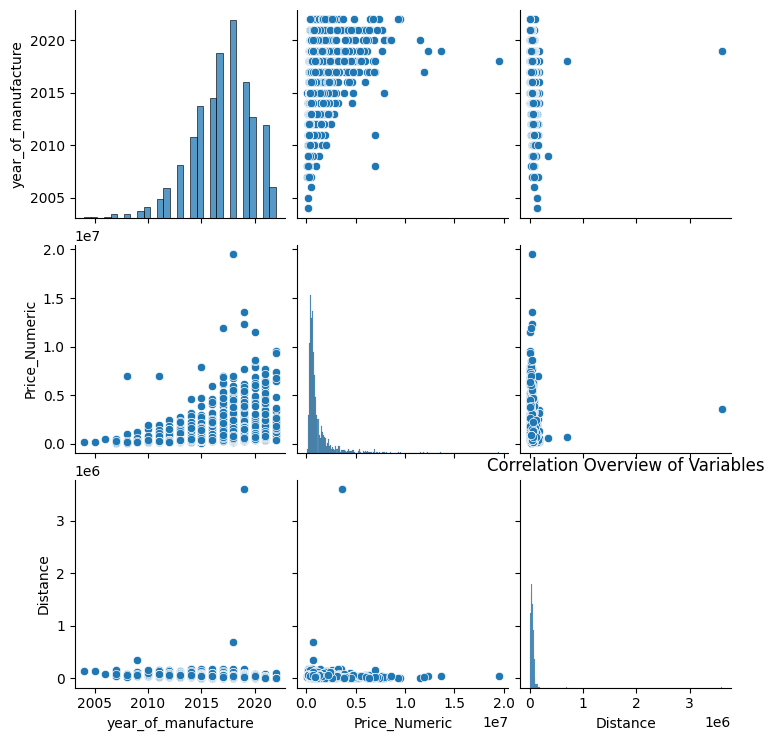

In [37]:
plt.figure(figsize=(10,8),dpi=150)
sns.pairplot(data=df)
plt.title('Correlation Overview of Variables')

In [38]:
def brand(name):
  return name.split()[0]

In [39]:
df['Brand'] = df['car_name'].apply(brand)
df['Brand']

0       Hyundai
1        Maruti
2          Tata
3        Maruti
4          Jeep
         ...   
2008       Ford
2009       MINI
2010    Hyundai
2011     Maruti
2012    Hyundai
Name: Brand, Length: 2013, dtype: object

In [40]:
df['Brand'].value_counts()

Maruti           539
Hyundai          417
Honda            220
Toyota            86
Tata              81
Ford              69
Mercedes-Benz     68
Renault           65
Mahindra          64
Audi              62
Volkswagen        59
BMW               55
Skoda             45
Kia               39
MG                26
Jeep              26
Nissan            18
Land              18
Volvo             13
Datsun            13
Jaguar             9
Chevrolet          6
Isuzu              4
MINI               4
Fiat               3
Porsche            2
Citroen            1
Bentley            1
Name: Brand, dtype: int64

In [41]:
df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,Price_Numeric,Distance,Brand
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016,445000.0,22402.0,Hyundai
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019,293000.0,10344.0,Maruti
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021,2249000.0,12999.0,Tata
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016,695000.0,45000.0,Maruti
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019,1200000.0,11193.0,Jeep


In [42]:
def Type_of_Car(price):
  if price <= 800000:
    return 'Budget'
  elif price > 800000 and price <= 2000000:
    return 'MidRange'
  elif price >2000000 and price < 10000000:
    return 'Luxury'
  else:
      return 'UltraLuxury'

In [43]:
df['Category'] = df['Price_Numeric'].apply(Type_of_Car)

In [44]:
df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,Price_Numeric,Distance,Brand,Category
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016,445000.0,22402.0,Hyundai,Budget
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019,293000.0,10344.0,Maruti,Budget
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021,2249000.0,12999.0,Tata,Luxury
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016,695000.0,45000.0,Maruti,Budget
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019,1200000.0,11193.0,Jeep,MidRange


Text(0.5, 1.0, 'Count of Categories')

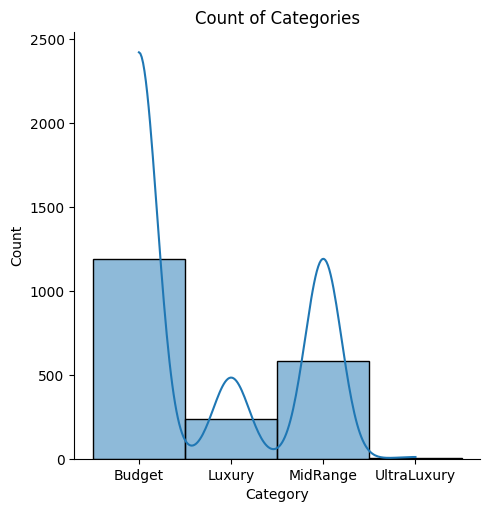

In [45]:
sns.displot(x='Category',data = df,kde=True)
plt.title('Count of Categories')

In [46]:
df['Category'].value_counts()

Budget         1187
MidRange        584
Luxury          237
UltraLuxury       5
Name: Category, dtype: int64

In [47]:
df['fuel_type'].value_counts()

Petrol        1283
Diesel         613
CNG             79
Petrol + 1      18
Electric         9
Diesel + 1       7
Hybrid           2
LPG              2
Name: fuel_type, dtype: int64

Text(0.5, 1.0, 'Count of fuels')

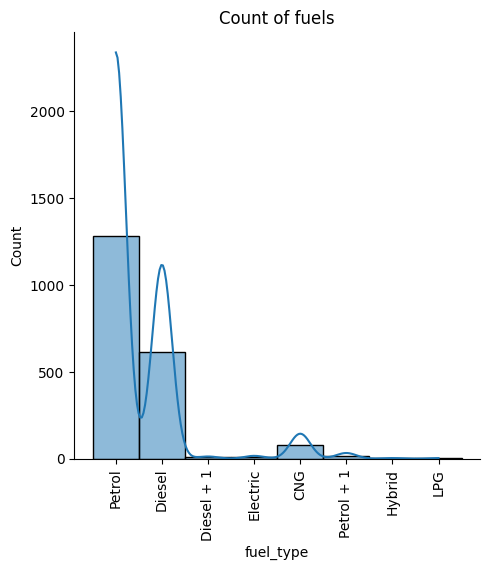

In [48]:
sns.displot(x='fuel_type',data = df,kde=True)
plt.xticks(rotation=90)
plt.title('Count of fuels')

Text(0.5, 1.0, 'Price Variations Based on Fuel Type')

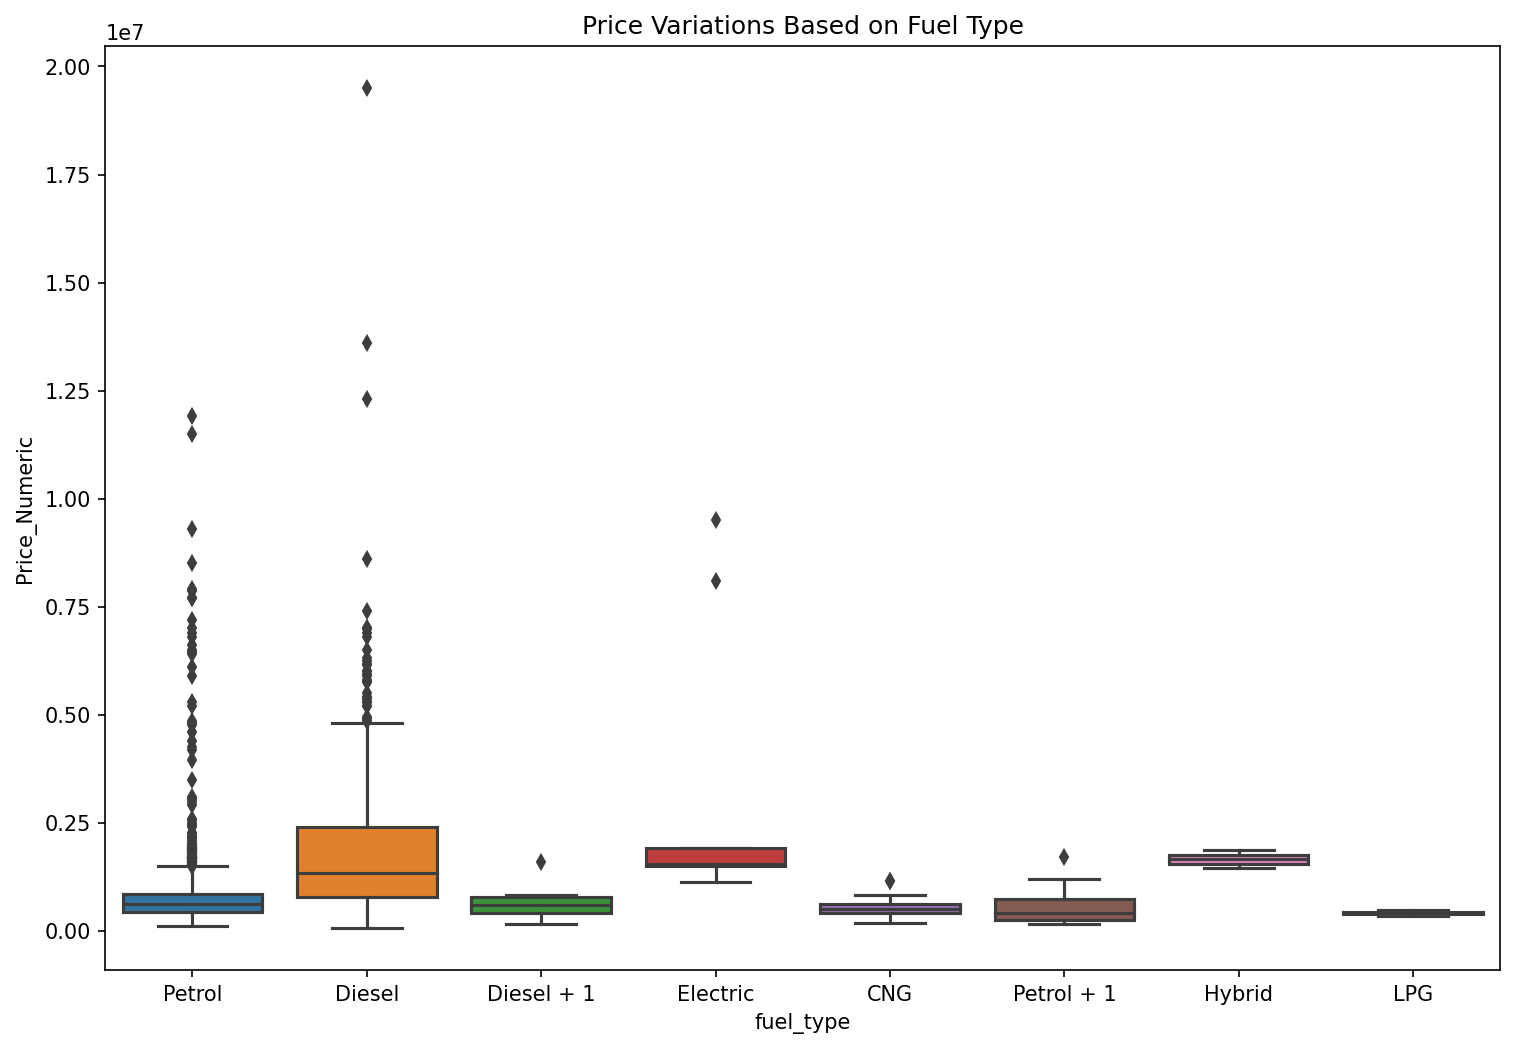

In [49]:
plt.figure(figsize=(12,8),dpi=150)
sns.boxplot(x='fuel_type',y='Price_Numeric',data=df)
plt.title("Price Variations Based on Fuel Type")

In [50]:
def filter_fuels(fuel):
  if fuel == 'Petrol' or fuel == 'Diesel' or fuel == 'CNG':
    return fuel
  else:
    return 'Other'

In [51]:
df['Filtered_Fuels'] = df['fuel_type'].apply(filter_fuels)


In [52]:
df.head(15)

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,Price_Numeric,Distance,Brand,Category,Filtered_Fuels
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016,445000.0,22402.0,Hyundai,Budget,Petrol
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019,293000.0,10344.0,Maruti,Budget,Petrol
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021,2249000.0,12999.0,Tata,Luxury,Diesel
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016,695000.0,45000.0,Maruti,Budget,Petrol
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019,1200000.0,11193.0,Jeep,MidRange,Petrol
5,Maruti Suzuki Eeco 5 STR WITH A/C+HTR [2019-2020],₹ 3.72 Lakh,"42,906 km",Petrol,Chennai,2017,372000.0,42906.0,Maruti,Budget,Petrol
6,Hyundai Creta SX Plus 1.6 AT CRDI,₹ 11.5 Lakh,"66,602 km",Diesel,Mumbai,2017,1150000.0,66602.0,Hyundai,MidRange,Diesel
7,Maruti Suzuki Ertiga VXi AT,₹ 10.39 Lakh,"13,189 km",Petrol,Bangalore,2019,1039000.0,13189.0,Maruti,MidRange,Petrol
8,Toyota Etios Liva G,₹ 3.75 Lakh,"67,815 km",Petrol,Mumbai,2013,375000.0,67815.0,Toyota,Budget,Petrol
9,Renault Kwid 1.0 RXT AMT Opt [2016-2019],₹ 4.25 Lakh,"19,509 km",Petrol,Mumbai,2018,425000.0,19509.0,Renault,Budget,Petrol


Text(0.5, 1.0, 'Price Variations Based on Fuel Type (Petrol, Diesel, CNG, Other)')

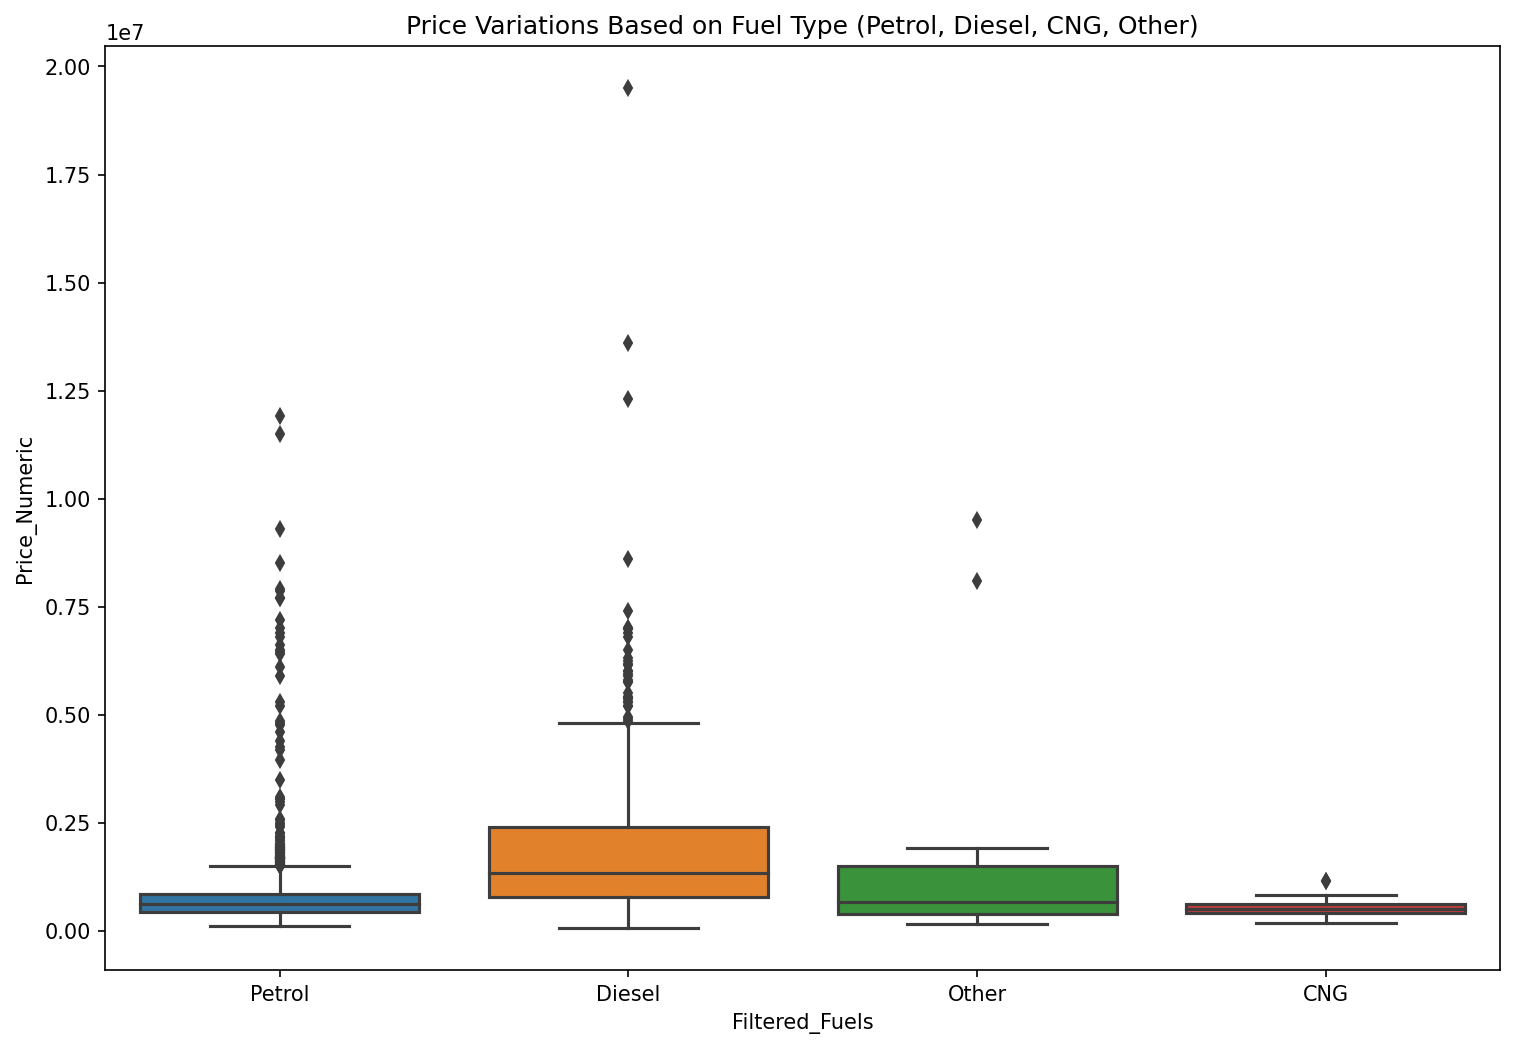

In [53]:
plt.figure(figsize=(12,8),dpi=150)
sns.boxplot(x='Filtered_Fuels',y='Price_Numeric',data=df)
plt.title("Price Variations Based on Fuel Type (Petrol, Diesel, CNG, Other)")

Text(0.5, 1.0, 'Distribution of Price by City')

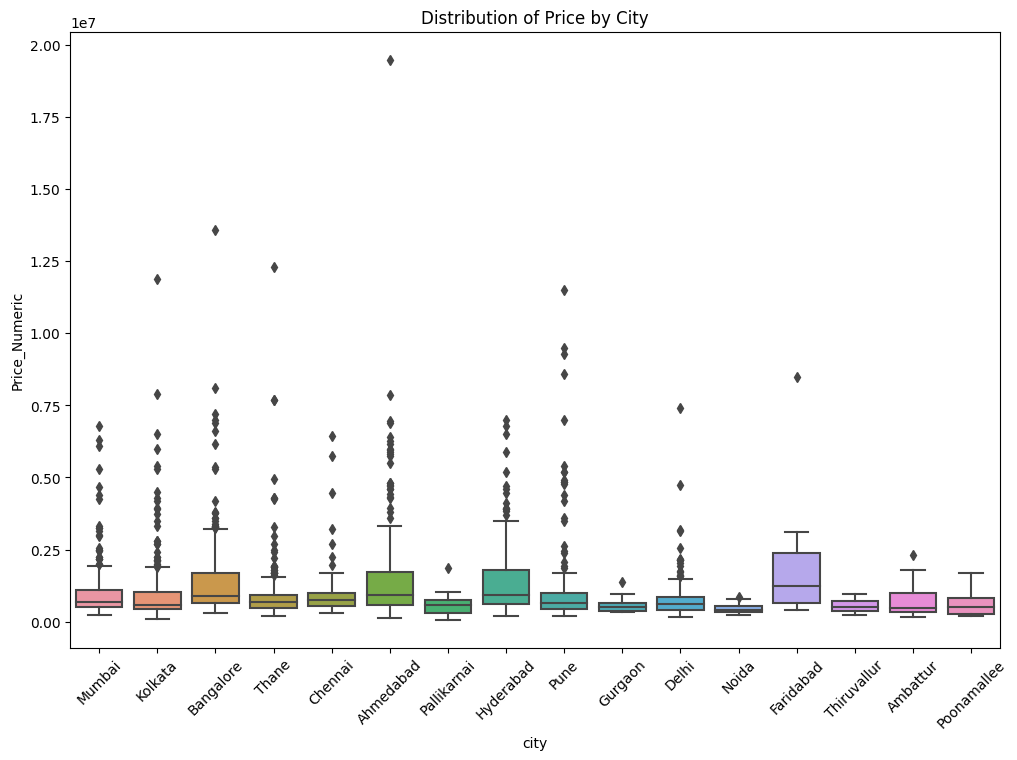

In [54]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='city', y='Price_Numeric', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Price by City')

In [55]:
df_copy_city = df.copy()

In [56]:
df['city'].value_counts()

Bangalore      240
Hyderabad      240
Thane          239
Ahmedabad      239
Kolkata        234
Mumbai         232
Pune           225
Delhi          174
Chennai         75
Noida           40
Ambattur        19
Pallikarnai     17
Thiruvallur     16
Gurgaon          8
Poonamallee      8
Faridabad        7
Name: city, dtype: int64

In [57]:
lis =  ['Bangalore', 'Hyderabad', 'Thane', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Pune', 'Delhi', 'Chennai']
def cityfilter(city):
  if city in lis:
    return city
  else:
    return 'Other'

In [58]:
df_copy_city['Filtered_City'] = df_copy_city['city'].apply(cityfilter)

In [59]:
df_copy_city['Filtered_City'].unique()

array(['Mumbai', 'Kolkata', 'Bangalore', 'Thane', 'Chennai', 'Ahmedabad',
       'Other', 'Hyderabad', 'Pune', 'Delhi'], dtype=object)

In [60]:
df_copy_city.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,Price_Numeric,Distance,Brand,Category,Filtered_Fuels,Filtered_City
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016,445000.0,22402.0,Hyundai,Budget,Petrol,Mumbai
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019,293000.0,10344.0,Maruti,Budget,Petrol,Kolkata
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021,2249000.0,12999.0,Tata,Luxury,Diesel,Bangalore
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016,695000.0,45000.0,Maruti,Budget,Petrol,Thane
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019,1200000.0,11193.0,Jeep,MidRange,Petrol,Kolkata


Text(0.5, 1.0, 'Distribution of Price by City')

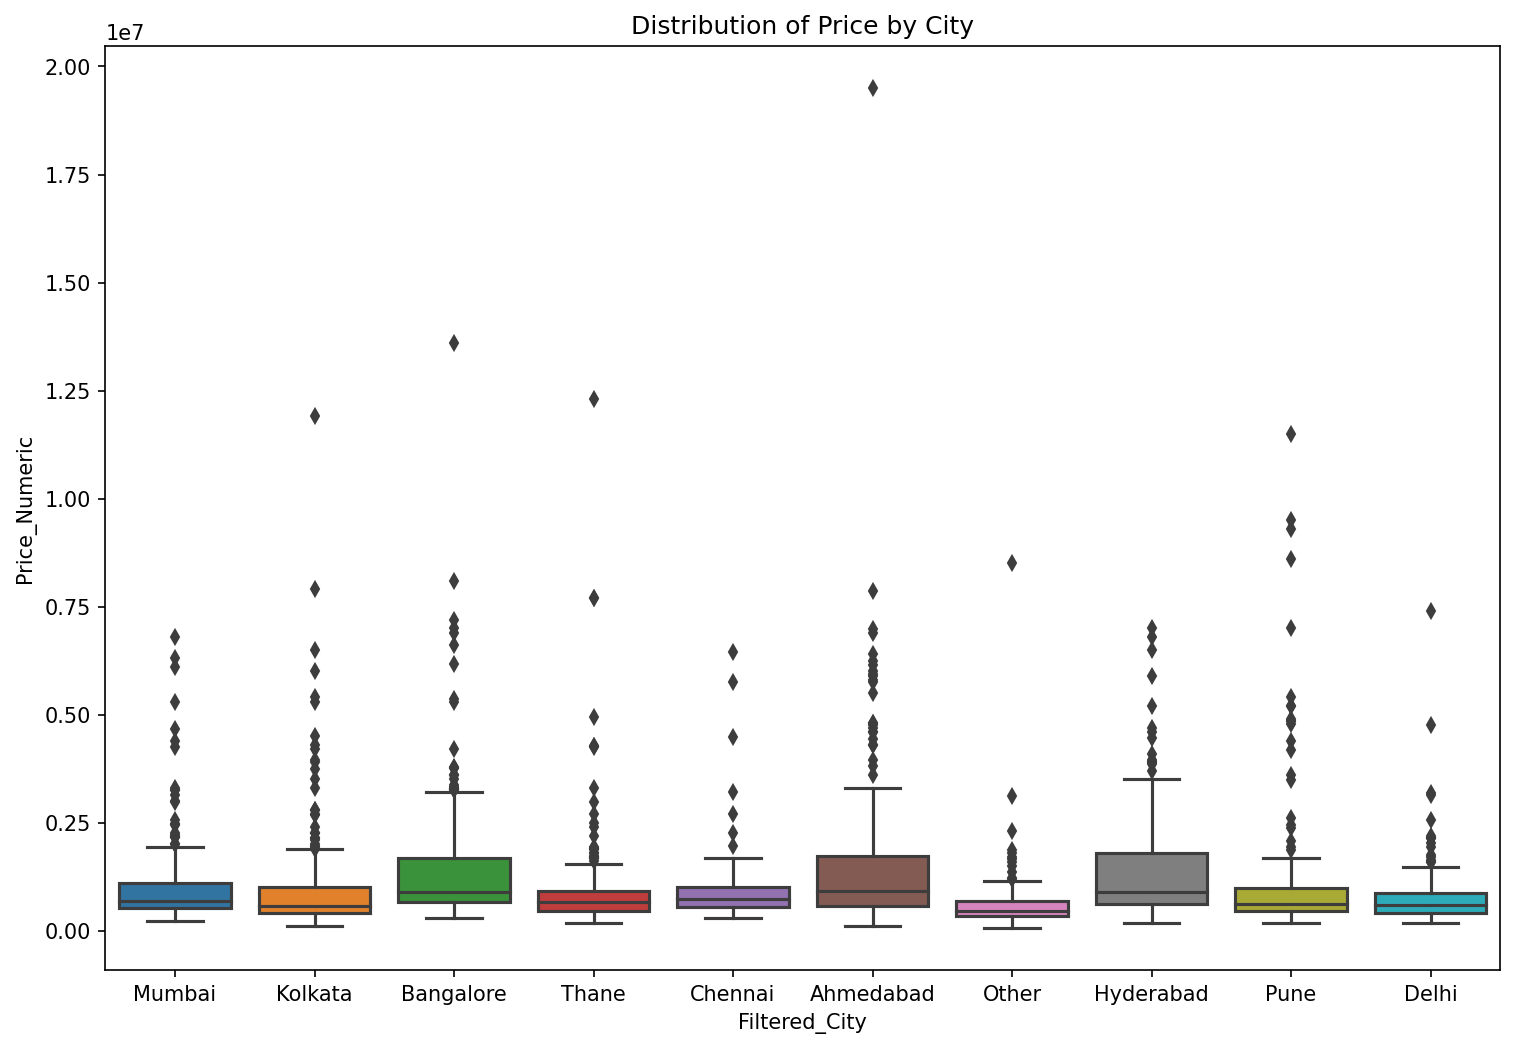

In [61]:
plt.figure(figsize=(12,8),dpi=150)
sns.boxplot(x='Filtered_City',y='Price_Numeric',data=df_copy_city)
plt.title('Distribution of Price by City')

Text(0.5, 1.0, 'Count of all Brands')

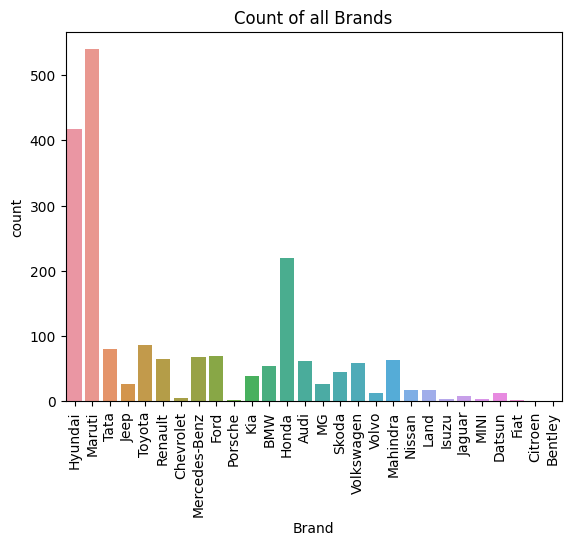

In [62]:
sns.countplot(x='Brand',data=df_copy_city)
plt.xticks(rotation=90)
plt.title('Count of all Brands')

In [63]:
df_copy_city['Brand'].value_counts()

Maruti           539
Hyundai          417
Honda            220
Toyota            86
Tata              81
Ford              69
Mercedes-Benz     68
Renault           65
Mahindra          64
Audi              62
Volkswagen        59
BMW               55
Skoda             45
Kia               39
MG                26
Jeep              26
Nissan            18
Land              18
Volvo             13
Datsun            13
Jaguar             9
Chevrolet          6
Isuzu              4
MINI               4
Fiat               3
Porsche            2
Citroen            1
Bentley            1
Name: Brand, dtype: int64

In [64]:
df_brand = df_copy_city[df_copy_city['Brand'].apply(lambda x: df_copy_city['Brand'].value_counts().get(x, 0) > 20)]

In [65]:
df_brand['Brand'].value_counts()

Maruti           539
Hyundai          417
Honda            220
Toyota            86
Tata              81
Ford              69
Mercedes-Benz     68
Renault           65
Mahindra          64
Audi              62
Volkswagen        59
BMW               55
Skoda             45
Kia               39
Jeep              26
MG                26
Name: Brand, dtype: int64

### Split the data into features and labels

In [66]:
X = df_brand.drop(['car_name','car_price_in_rupees','kms_driven','fuel_type','city'],axis=1)
y = df_brand['Price_Numeric']

In [67]:
X = pd.get_dummies(X, columns=['Brand', 'Filtered_Fuels','Category','Filtered_City'], drop_first=True)  # One-hot encoding

y = df_brand['Price_Numeric']

In [68]:
X.columns

Index(['year_of_manufacture', 'Price_Numeric', 'Distance', 'Brand_BMW',
       'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Jeep', 'Brand_Kia',
       'Brand_MG', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz',
       'Brand_Renault', 'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota',
       'Brand_Volkswagen', 'Filtered_Fuels_Diesel', 'Filtered_Fuels_Other',
       'Filtered_Fuels_Petrol', 'Category_Luxury', 'Category_MidRange',
       'Category_UltraLuxury', 'Filtered_City_Bangalore',
       'Filtered_City_Chennai', 'Filtered_City_Delhi',
       'Filtered_City_Hyderabad', 'Filtered_City_Kolkata',
       'Filtered_City_Mumbai', 'Filtered_City_Other', 'Filtered_City_Pune',
       'Filtered_City_Thane'],
      dtype='object')

In [69]:
X.corr()

,year_of_manufacture,Price_Numeric,Distance,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Jeep,Brand_Kia,Brand_MG,...,Category_UltraLuxury,Filtered_City_Bangalore,Filtered_City_Chennai,Filtered_City_Delhi,Filtered_City_Hyderabad,Filtered_City_Kolkata,Filtered_City_Mumbai,Filtered_City_Other,Filtered_City_Pune,Filtered_City_Thane
year_of_manufacture,1.000000,0.289153,-0.159498,-0.037223,-0.049898,-0.116836,-0.048729,0.065173,0.165229,0.138709,...,-0.000384,0.070363,0.104134,0.031492,-0.037231,0.003781,-4.512338e-02,-0.136417,0.064836,-0.054563
Price_Numeric,0.289153,1.000000,0.011559,0.333706,-0.015219,-0.119896,-0.173381,0.102840,0.053571,0.097555,...,0.219094,0.096613,-0.003322,-0.081643,0.073723,-0.047677,-1.405916e-02,-0.097891,-0.004528,-0.080997
Distance,-0.159498,0.011559,1.000000,0.124970,0.013999,0.004687,-0.035138,-0.015204,-0.038229,-0.034969,...,-0.006245,-0.039039,-0.014449,-0.024935,0.062867,-0.051535,-1.392599e-02,0.049169,0.039278,-0.002969
Brand_BMW,-0.037223,0.333706,0.124970,1.000000,-0.033138,-0.061743,-0.090400,-0.020110,-0.024714,-0.020110,...,-0.003918,-0.024398,-0.001925,-0.021298,0.015741,0.016363,5.129142e-03,-0.041902,-0.032983,-0.034471
Brand_Ford,-0.049898,-0.015219,0.013999,-0.033138,1.000000,-0.069417,-0.101636,-0.022609,-0.027786,-0.022609,...,-0.004405,-0.001639,-0.024100,-0.011863,-0.008819,0.026845,1.634347e-02,0.062188,-0.052484,-0.019485
Brand_Honda,-0.116836,-0.119896,0.004687,-0.061743,-0.069417,1.000000,-0.189367,-0.042125,-0.051770,-0.042125,...,-0.008207,-0.035944,-0.012527,-0.033193,-0.058885,-0.032326,1.020709e-01,0.054158,-0.033369,0.018427
Brand_Hyundai,-0.048729,-0.173381,-0.035138,-0.090400,-0.101636,-0.189367,1.000000,-0.061677,-0.075800,-0.061677,...,-0.012017,-0.001925,-0.000417,-0.002443,-0.029201,-0.019682,-2.305406e-04,-0.024361,0.057523,0.043069
Brand_Jeep,0.065173,0.102840,-0.015204,-0.020110,-0.022609,-0.042125,-0.061677,1.000000,-0.016862,-0.013720,...,-0.002673,-0.015126,-0.023446,-0.036850,0.041936,0.014244,4.112615e-02,0.010527,-0.014320,-0.001568
Brand_Kia,0.165229,0.053571,-0.038229,-0.024714,-0.027786,-0.051770,-0.075800,-0.016862,1.000000,-0.016862,...,-0.003285,0.004236,0.047904,-0.032393,-0.017599,0.017506,-6.739028e-03,-0.035135,0.016970,-0.007611
Brand_MG,0.138709,0.097555,-0.034969,-0.020110,-0.022609,-0.042125,-0.061677,-0.013720,-0.016862,1.000000,...,-0.002673,0.110241,-0.023446,0.010363,-0.014320,0.000125,-1.480542e-02,-0.009031,-0.042449,-0.015445


Text(0.5, 1.0, 'Correlation Heatmap')

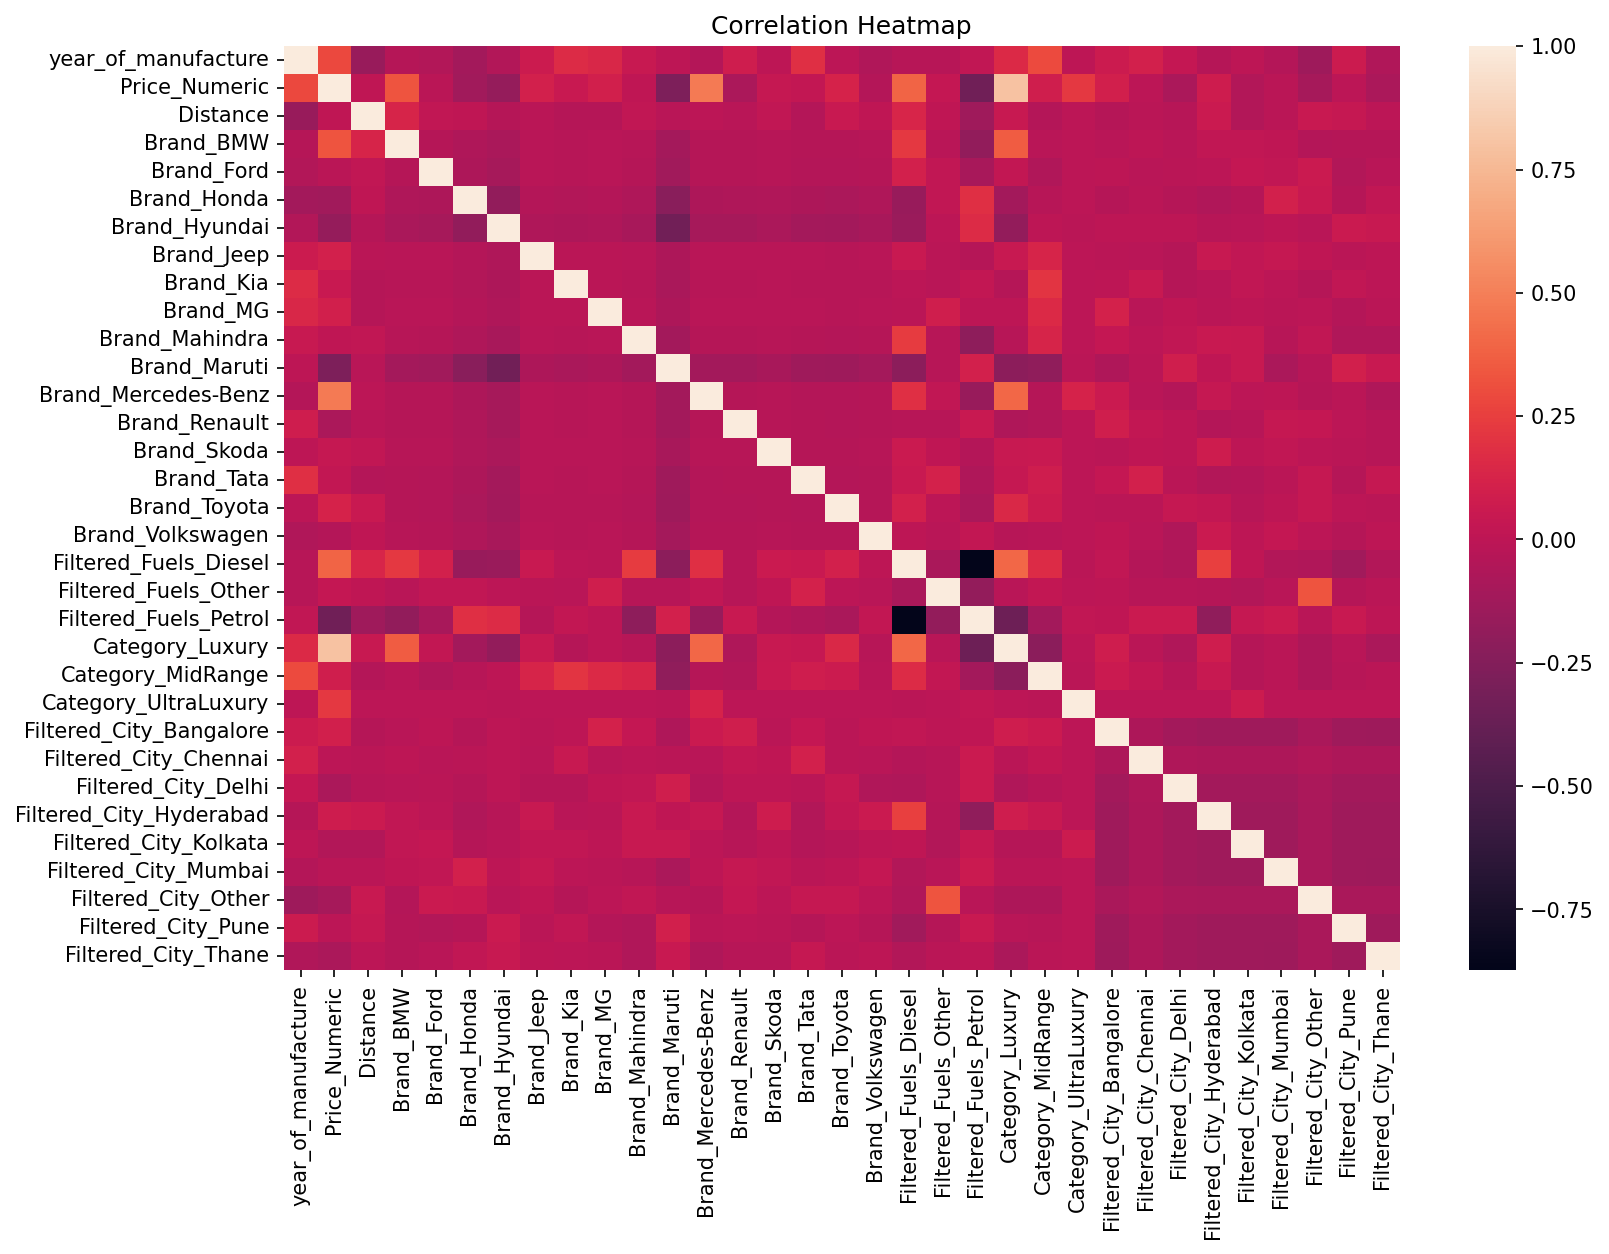

In [70]:
plt.figure(figsize=(12,8),dpi=150)
sns.heatmap(X.corr())
plt.title('Correlation Heatmap')

In [71]:
X.corr()['Price_Numeric'].sort_values(ascending=False)

Price_Numeric              1.000000
Category_Luxury            0.795397
Brand_Mercedes-Benz        0.476566
Filtered_Fuels_Diesel      0.385918
Brand_BMW                  0.333706
year_of_manufacture        0.289153
Category_UltraLuxury       0.219094
Brand_Toyota               0.121070
Brand_Jeep                 0.102840
Brand_MG                   0.097555
Filtered_City_Bangalore    0.096613
Category_MidRange          0.085649
Filtered_City_Hyderabad    0.073723
Brand_Kia                  0.053571
Brand_Skoda                0.041237
Filtered_Fuels_Other       0.032330
Brand_Tata                 0.019752
Distance                   0.011559
Brand_Mahindra             0.009763
Filtered_City_Chennai     -0.003322
Filtered_City_Pune        -0.004528
Filtered_City_Mumbai      -0.014059
Brand_Ford                -0.015219
Brand_Volkswagen          -0.043017
Filtered_City_Kolkata     -0.047677
Brand_Renault             -0.080793
Filtered_City_Thane       -0.080997
Filtered_City_Delhi       -0

In [72]:
abs(X.corr()['Price_Numeric']).sort_values(ascending=False)

Price_Numeric              1.000000
Category_Luxury            0.795397
Brand_Mercedes-Benz        0.476566
Filtered_Fuels_Diesel      0.385918
Filtered_Fuels_Petrol      0.335569
Brand_BMW                  0.333706
year_of_manufacture        0.289153
Brand_Maruti               0.275335
Category_UltraLuxury       0.219094
Brand_Hyundai              0.173381
Brand_Toyota               0.121070
Brand_Honda                0.119896
Brand_Jeep                 0.102840
Filtered_City_Other        0.097891
Brand_MG                   0.097555
Filtered_City_Bangalore    0.096613
Category_MidRange          0.085649
Filtered_City_Delhi        0.081643
Filtered_City_Thane        0.080997
Brand_Renault              0.080793
Filtered_City_Hyderabad    0.073723
Brand_Kia                  0.053571
Filtered_City_Kolkata      0.047677
Brand_Volkswagen           0.043017
Brand_Skoda                0.041237
Filtered_Fuels_Other       0.032330
Brand_Tata                 0.019752
Brand_Ford                 0

In [73]:
X = X.drop(['Price_Numeric'], axis=1)

**MODEL**

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()

In [77]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [78]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(scaled_X_train,y_train)
test_predictions = model.predict(scaled_X_test)

In [79]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [80]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [81]:
MAE

240459.61487864013

In [82]:
MSE

188682490130.6569

In [83]:
RMSE

434375.9778471375

In [84]:
final_model = LinearRegression()
final_model.fit(X,y)
y_hat = final_model.predict(X)

In [85]:
from sklearn.metrics import r2_score
r2 = r2_score(test_predictions, y_test)
r2

0.8058549597775961

In [86]:
test_res = y_test - test_predictions

In [87]:
X_train.head()

,year_of_manufacture,Distance,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Jeep,Brand_Kia,Brand_MG,Brand_Mahindra,...,Category_UltraLuxury,Filtered_City_Bangalore,Filtered_City_Chennai,Filtered_City_Delhi,Filtered_City_Hyderabad,Filtered_City_Kolkata,Filtered_City_Mumbai,Filtered_City_Other,Filtered_City_Pune,Filtered_City_Thane
367,2017,27654.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
118,2014,43000.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1001,2019,20744.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1336,2019,37499.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1265,2022,2377.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [88]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
year_of_manufacture,7.073654e+04
Distance,-1.153023e-01
Brand_BMW,1.547224e+05
Brand_Ford,-7.720512e+05
Brand_Honda,-7.675385e+05
Brand_Hyundai,-8.169799e+05
Brand_Jeep,-2.460495e+05
Brand_Kia,-5.416054e+05
Brand_MG,-2.423749e+05
Brand_Mahindra,-6.868688e+05


### Ridge Regularization to reduce overfitting

In [89]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=1.0)  # Initialize Ridge regression with a regularization parameter alpha
scores = cross_val_score(ridge, scaled_X_train, y_train, cv=5, scoring='r2')  # 5-fold cross-validation
print("Mean R-squared:", scores.mean())

Mean R-squared: 0.7393845053636472


Text(0.5, 1.0, 'Residual Plot: Actual vs. Residuals')

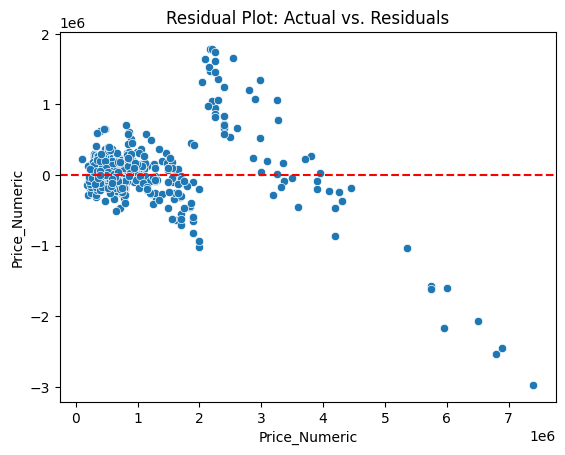

In [90]:
test_residuals = test_predictions - y_test
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot: Actual vs. Residuals')

Text(0.5, 1.0, 'Residuals Distribution Plot')

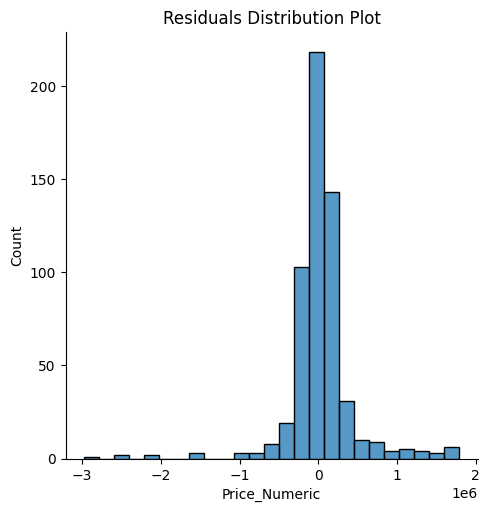

In [91]:
sns.displot(test_residuals,bins=25)
plt.title('Residuals Distribution Plot')

In [92]:
adjusted_r2 = 1 - ((1 - r2) * (len(y_test) - 1)) / (len(y_test) - len(X.columns) - 1)

In [93]:
adjusted_r2

0.7944346632939253

### Ridge model with cross validation


### Train|Validation|Test split

In [94]:
from sklearn.model_selection import train_test_split

# 70% of data is training data, set aside other 30%
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.3, random_state=101)

# Remaining 30% is split into evaluation and test sets
# Each is 15% of the original data size
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=101)

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_eval = scaler.transform(X_eval)
X_test = scaler.transform(X_test)

In [96]:
from sklearn.linear_model import Ridge
model_ridge = Ridge()
model_ridge.fit(X_train,y_train)
y_eval_pred = model_ridge.predict(X_eval)

In [97]:
MSE = mean_squared_error(y_eval,y_eval_pred)
MSE

187873987321.3967

In [98]:
RMSE = np.sqrt(MSE)
RMSE

433444.33012948354

In [99]:
test_res = y_eval - y_eval_pred

Text(0.5, 1.0, 'Residual Plot: Actual vs. Residuals')

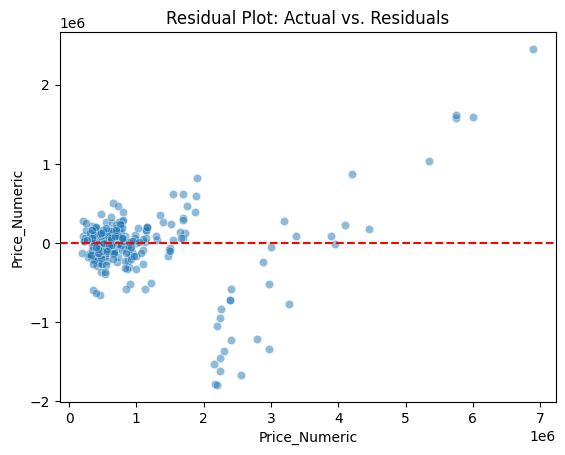

In [100]:
sns.scatterplot(x=y_eval,y=test_res,alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot: Actual vs. Residuals')

(0.0, 1500000.0)

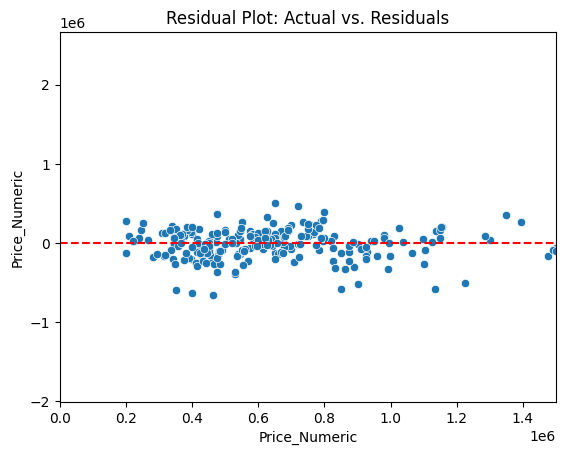

In [101]:
sns.scatterplot(x=y_eval,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot: Actual vs. Residuals')
plt.xlim(0,1500000)

Text(0.5, 1.0, 'Residuals Distribution Plot')

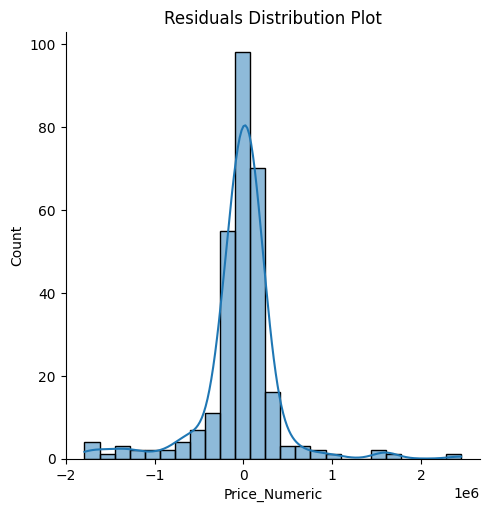

In [102]:
sns.displot(test_res,bins=25,kde=True)
plt.title('Residuals Distribution Plot')

In [103]:
y_final_test_pred = model_ridge.predict(X_test)

In [104]:
MSE = mean_squared_error(y_test,y_final_test_pred)
MSE

189366050231.66565

In [105]:
RMSE = np.sqrt(MSE)
RMSE

435162.0965015975

## K-fold cross validation

In [106]:
from sklearn.model_selection import cross_validate
scores = cross_validate(model_ridge,X_train,y_train,
                         scoring=['neg_mean_absolute_error','neg_mean_squared_error','max_error'],cv=5)

In [107]:
scores

{'fit_time': array([0.01400304, 0.00714612, 0.00658774, 0.00588202, 0.00716138]),
 'score_time': array([0.00187922, 0.00174904, 0.00229931, 0.00281906, 0.00219011]),
 'test_neg_mean_absolute_error': array([-296152.57599722, -293493.02088367, -270065.38698481,
        -291990.84818515, -246288.54848216]),
 'test_neg_mean_squared_error': array([-4.50685156e+11, -3.56244930e+11, -2.35616386e+11, -5.66460970e+11,
        -1.99949477e+11]),
 'test_max_error': array([ -5423734.0316539 ,  -4463380.83976269,  -3068820.27518267,
        -10012647.04290293,  -3287602.32334729])}

### Lasso Regularization

In [108]:
from sklearn.linear_model import LassoCV

In [109]:
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)



In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [112]:
lasso_cv_model.fit(scaled_X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [113]:
test_predictions = lasso_cv_model.predict(scaled_X_test)

In [114]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [115]:
MAE

282587.0553032569

In [116]:
RMSE

479233.621615582

In [117]:
test_res = y_test - test_predictions

Text(0.5, 1.0, 'Residuals Distribution Plot')

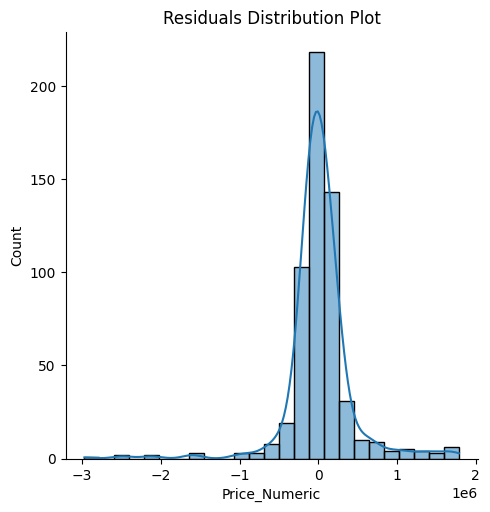

In [118]:
sns.displot(test_residuals,bins=25,kde=True)
plt.title('Residuals Distribution Plot')

### Elastic Net(Comibination of ridge and lass)

In [119]:
from sklearn.linear_model import ElasticNetCV

In [120]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)


In [121]:
elastic_model.fit(scaled_X_train,y_train,)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [122]:
test_predictions = elastic_model.predict(scaled_X_test)

In [123]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [124]:
MAE

238581.8290867351

In [125]:
RMSE

435578.3691557641

In [126]:
train_predictions = elastic_model.predict(scaled_X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

256210.00870555756

In [127]:
elastic_model.coef_

array([ 181098.8320132 ,  -13199.10025373,   58584.58291708,
       -106755.44479339, -171150.8023101 , -238449.74420535,
          2661.56351739,  -44267.95737929,   -1485.03313166,
        -73014.9237146 , -300453.12919482,  116754.90137095,
       -131091.65613347,  -70926.60289893, -134141.49572509,
        -76606.60918261,  -95258.57906004,   40238.74580041,
         81493.49382874,   35258.75076059,  735948.52193649,
        158201.05555531,  276513.33245367,    9845.92553271,
         -8051.14937553,  -35168.62540178,      -0.        ,
        -37738.40606431,       0.        ,  -27998.42353491,
         39431.07321103,    5690.47225156])

Text(0.5, 1.0, 'Residual Plot: Actual vs. Residuals')

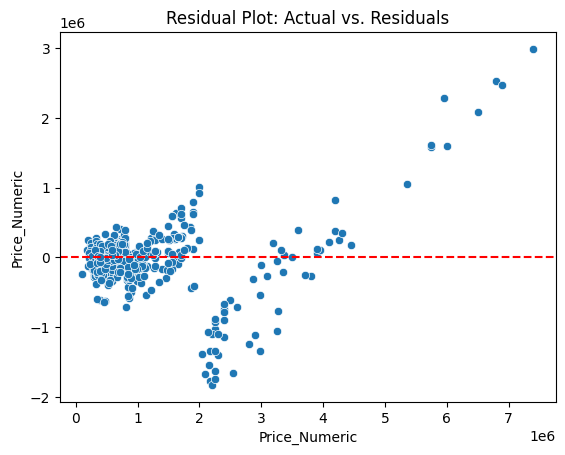

In [128]:
test_res = y_test - test_predictions
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot: Actual vs. Residuals')

Text(0.5, 1.0, 'Residuals Distribution Plot')

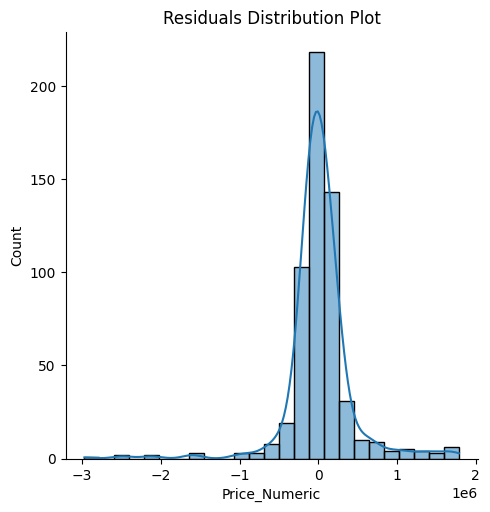

In [129]:
sns.displot(test_residuals,bins=25,kde=True)
plt.title('Residuals Distribution Plot')

### **Grid Search for finding the best hyper parameters for ridge model**

In [137]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0],  # Regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Solver for optimization
}

In [138]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model_ridge, param_grid, cv=5)
grid_search.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']})

In [139]:
best_params = grid_search.best_params_
Best_Estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict using the best estimator on test data
predicted_values_best = Best_Estimator.predict(scaled_X_test)
print("Predicted values for scaled test data using best estimator:", predicted_values_best)

# Evaluate the best estimator (optional)
mse_best = mean_squared_error(y_test,predicted_values_best)
print("Mean Squared Error using best estimator for Ridge Model:", mse_best)

Best Parameters: {'alpha': 10.0, 'solver': 'saga'}
Predicted values for scaled test data using best estimator: [ 988900.79702674  594748.06423937  596350.74848065  565514.70841632
 1593683.69609474 1319046.4328915   526811.58804107 1419025.4597568
  651112.61501733 1216807.71958801  772130.8563935   663824.9843675
   29989.60428481  847557.51140412  258776.51120478  697801.83982424
  122201.20686228  364400.92247413  214856.4935856   879132.45101458
 1484239.1224252   620826.65938387 3345689.35690269  481211.09362844
  540953.77478559 1054889.48819152 2923028.32132684  474748.47475219
  590028.72592825 1388071.64165803  689728.78857713  943899.36662205
 1026129.62799557  366855.53717192  497538.53564836  729107.77084143
 1404845.8080623   652587.88858973  608641.6400468   700755.90400617
  842704.5636886  1252439.84158803 1090578.40188397  344024.42609537
  292299.37526028 1417719.99794948  506209.24717829  564764.37854224
 1141653.20631876 3949409.29143144  463839.35391786 1021006.975

In [140]:
print('Root mean Squared error for best Ridge estimator',np.sqrt(mse_best))

Root mean Squared error for best Ridge estimator 433920.9815048918


In [141]:
print('Best parameters: ',best_params)

Best parameters:  {'alpha': 10.0, 'solver': 'saga'}


Apply Grid Search for Lasso model

In [142]:
param_grid_lasso_cv = {
    'alphas': [None, [0.001, 0.01, 0.1, 1, 10, 100]],
    'max_iter': [1000, 5000, 10000],
    'eps': [0.001, 0.01, 0.1],

}
# Create a GridSearchCV object
grid_search_lasso = GridSearchCV(lasso_cv_model, param_grid_lasso_cv, cv=5)

# Fit the model to the training data
grid_search_lasso.fit(scaled_X_train, y_train)

# Extract the best parameters and best estimator
best_params_lasso = grid_search_lasso.best_params_
best_estimator_lasso = grid_search_lasso.best_estimator_

# Print the best parameters
print("Best Parameters for Lasso:", best_params_lasso)

# Predict using the best estimator on the test data
predicted_values_best_lasso = best_estimator_lasso.predict(scaled_X_test)

# Evaluate the best estimator (optional)
mse_best_lasso = mean_squared_error(y_test, predicted_values_best_lasso)
print("Mean Squared Error using best Lasso estimator:", mse_best_lasso)
rmse_best_lasso = np.sqrt(mse_best_lasso)
print("Root Mean Squared Error using best Lasso estimator:", rmse_best_lasso)

Best Parameters for Lasso: {'alphas': None, 'eps': 0.001, 'max_iter': 1000}
Mean Squared Error using best Lasso estimator: 189284109776.01288
Root Mean Squared Error using best Lasso estimator: 435067.93696618563


Apply Grid Search for Elastic Net Model

In [143]:
param_grid_elasticnet_cv = {
    'l1_ratio': [0.1, 0.5, 0.9],  # L1 ratio (0 = L2 penalty, 1 = L1 penalty)
    'alphas': [None, [0.001, 0.01, 0.1, 1, 10, 100]],  # Alphas to try
    'max_iter': [1000, 5000, 10000],  # Maximum number of iterations
    'tol': [0.0001, 0.001, 0.01],  # Tolerance for the optimization

}

grid_search_elastic = GridSearchCV(elastic_model, param_grid_elasticnet_cv, cv=5)

# Fit the model to the training data
grid_search_elastic.fit(scaled_X_train, y_train)

# Extract the best parameters and best estimator
best_params_elastic = grid_search_elastic.best_params_
best_estimator_elastic = grid_search_elastic.best_estimator_

# Print the best parameters
print("Best Parameters for Elastic Net:", best_params_elastic)

# Predict using the best estimator on the test data
predicted_values_best_elastic = best_estimator_elastic.predict(scaled_X_test)

# Evaluate the best estimator (optional)
mse_best_elastic = mean_squared_error(y_test, predicted_values_best_elastic)
print("Mean Squared Error using best Elastic Net estimator:", mse_best_elastic)
rmse_best_elastic = np.sqrt(mse_best_elastic)
print("Root Mean Squared Error using best Elastic Net estimator:", rmse_best_elastic)

Best Parameters for Elastic Net: {'alphas': [0.001, 0.01, 0.1, 1, 10, 100], 'l1_ratio': 0.1, 'max_iter': 1000, 'tol': 0.0001}
Mean Squared Error using best Elastic Net estimator: 188123637328.7337
Root Mean Squared Error using best Elastic Net estimator: 433732.21845827147
